In [1]:
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn  as sns
from scipy import stats
import math
import statistics
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [2]:
df_train = pd.read_csv("Titanic_train.csv")

In [3]:
#Q1:觀察票價是否有異常值的現象?
#方法1
#先透過 計算統計值， 分別呈現數量，票價平均，標準差，最大值和最小值。
print(df_train['Fare'].describe())
# 透過這樣的方式，票價最低 0 元和最高 512.3292 元都在合理範圍內，所以第一關 pass。

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


In [4]:
#方法2，進行3倍標準差原則的計算，從而檢視哪些值是可疑的異常值(Z-score method)
import numpy as np

# 創建一個函數，計算在這個資料中， ys:資料，times : 幾倍標準差，找出在這樣條件下的異常值。
def outliers_z_score(ys,times):
    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > times)

out_index=outliers_z_score(df_train['Fare'],3)
print(out_index[0])
print("用第二種方法的找出的 outlier 有哪些?")
print(df_train.loc[out_index[0],'Fare'])
#  所以用這個方法，找出的 outlier 就是少數族群，為票價較高的20位乘客。

[ 27  88 118 258 299 311 341 377 380 438 527 557 679 689 700 716 730 737
 742 779]
用第二種方法的找出的 outlier 有哪些?
27     263.0000
88     263.0000
118    247.5208
258    512.3292
299    247.5208
311    262.3750
341    263.0000
377    211.5000
380    227.5250
438    263.0000
527    221.7792
557    227.5250
679    512.3292
689    211.3375
700    227.5250
716    227.5250
730    211.3375
737    512.3292
742    262.3750
779    211.3375
Name: Fare, dtype: float64


In [5]:
#方法3-盒鬚圖判別法(IQR method)
# 透過一個函數來判斷是否為異常值
def outliers_iqr(ys,times):
    #因Fare無遺失值，所以使用 np.percentile
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * times)
    upper_bound = quartile_3 + (iqr * times)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [6]:
out_index2=outliers_iqr(df_train['Fare'],1.5)
print(out_index2)
print("用第三種方法的找出的 outlier 有哪些?(1.5 倍IQR)")
print(df_train.loc[out_index2[0],'Fare'])
#  所以用這個方法，找出的 outlier 就是少數族群，為票價較高的116位乘客。

(array([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102, 118, 120, 124,
       139, 151, 159, 180, 195, 201, 215, 218, 224, 230, 245, 256, 257,
       258, 262, 268, 269, 275, 290, 291, 297, 299, 305, 306, 307, 310,
       311, 318, 319, 324, 325, 332, 334, 336, 337, 341, 366, 369, 373,
       375, 377, 380, 385, 390, 393, 412, 435, 438, 445, 453, 484, 486,
       496, 498, 504, 505, 520, 527, 537, 540, 544, 550, 557, 558, 581,
       585, 587, 591, 609, 627, 641, 645, 655, 659, 660, 665, 679, 681,
       689, 698, 700, 708, 716, 730, 737, 741, 742, 745, 759, 763, 765,
       779, 789, 792, 802, 820, 829, 835, 846, 849, 856, 863, 879],
      dtype=int64),)
用第三種方法的找出的 outlier 有哪些?(1.5 倍IQR)
1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
         ...   
846     69.5500
849     89.1042
856    164.8667
863     69.5500
879     83.1583
Name: Fare, Length: 116, dtype: float64


In [7]:
out_index3=outliers_iqr(df_train['Fare'],2)
print(out_index3)
print("用第三種方法的找出的 outlier 有哪些?(2 倍IQR)")
print(df_train.loc[out_index3[0],'Fare'])
#  所以用這個方法，找出的 outlier 就是少數族群，為票價較高的92位乘客。

(array([ 27,  31,  34,  61,  62,  88, 102, 118, 124, 139, 195, 215, 224,
       230, 245, 256, 257, 258, 262, 268, 269, 275, 290, 291, 297, 299,
       305, 306, 307, 310, 311, 318, 319, 325, 332, 334, 337, 341, 373,
       375, 377, 380, 390, 393, 412, 435, 438, 445, 453, 484, 486, 496,
       498, 504, 505, 520, 527, 537, 544, 550, 557, 558, 581, 585, 587,
       591, 609, 627, 659, 660, 679, 689, 698, 700, 708, 716, 730, 737,
       741, 742, 759, 763, 765, 779, 789, 802, 820, 829, 835, 849, 856,
       879], dtype=int64),)
用第三種方法的找出的 outlier 有哪些?(2 倍IQR)
27     263.0000
31     146.5208
34      82.1708
61      80.0000
62      83.4750
         ...   
829     80.0000
835     83.1583
849     89.1042
856    164.8667
879     83.1583
Name: Fare, Length: 92, dtype: float64


In [8]:
out_index4=outliers_iqr(df_train['Fare'],3)
print(out_index4)
print("用第三種方法的找出的 outlier 有哪些?(3 倍IQR)")
print(df_train.loc[out_index4[0],'Fare'])
#  所以用這個方法，找出的 outlier 就是少數族群，為票價較高的53位乘客。

(array([ 27,  31,  88, 118, 195, 215, 258, 268, 269, 297, 299, 305, 306,
       307, 311, 318, 319, 325, 332, 334, 337, 341, 373, 377, 380, 390,
       393, 435, 438, 498, 505, 527, 537, 544, 550, 557, 581, 609, 659,
       660, 679, 689, 698, 700, 708, 716, 730, 737, 742, 763, 779, 802,
       856], dtype=int64),)
用第三種方法的找出的 outlier 有哪些?(3 倍IQR)
27     263.0000
31     146.5208
88     263.0000
118    247.5208
195    146.5208
215    113.2750
258    512.3292
268    153.4625
269    135.6333
297    151.5500
299    247.5208
305    151.5500
306    110.8833
307    108.9000
311    262.3750
318    164.8667
319    134.5000
325    135.6333
332    153.4625
334    133.6500
337    134.5000
341    263.0000
373    135.6333
377    211.5000
380    227.5250
390    120.0000
393    113.2750
435    120.0000
438    263.0000
498    151.5500
505    108.9000
527    221.7792
537    106.4250
544    106.4250
550    110.8833
557    227.5250
581    110.8833
609    153.4625
659    113.2750
660    133.6500
679    512.

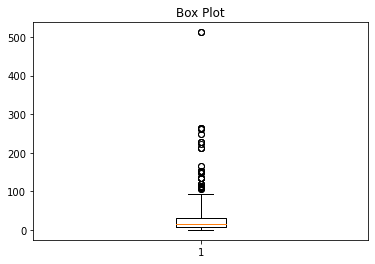

In [9]:
plt.boxplot(df_train['Fare'],whis=3)    #作圖
plt.title('Box Plot')
plt.show()

In [10]:
mask = df_train["Fare"]>100
df_train[mask]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C
195,196,1,1,"Lurette, Miss. Elise",female,58.00,0,0,PC 17569,146.5208,B80,C
215,216,1,1,"Newell, Miss. Madeleine",female,31.00,1,0,35273,113.2750,D36,C
258,259,1,1,"Ward, Miss. Anna",female,35.00,0,0,PC 17755,512.3292,NaN,C
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.00,0,1,PC 17582,153.4625,C125,S
269,270,1,1,"Bissette, Miss. Amelia",female,35.00,0,0,PC 17760,135.6333,C99,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S


In [ ]:
#Q2:你覺得找出的異常是真的異常? 你覺得需要做處理嗎?
#用方法2進行3倍標準差原則的計算，找出的 outlier為票價最高的20位乘客。
#用方法3盒鬚圖判別法(IQR method)3倍IQR，找出的 outlier為票價最高的53位乘客。
#但與Pclass一起看，可以發現這些所謂的outlier都是頭等艙的乘客。所以我覺得找出的異常不是真異常，因此不需要處理。